
SOURCE : This note book followed code from the link
https://www.kaggle.com/code/jhoward/first-steps-road-to-the-top-part-1

In [ ]:
! pip install --upgrade fastai fastcore timm kaggle pynvml nbdev -qq

     |████████████████████████████████| 549 kB 12.9 MB/s 
     |████████████████████████████████| 46 kB 1.1 MB/s 
     |████████████████████████████████| 64 kB 886 kB/s 
     |████████████████████████████████| 182 kB 64.5 MB/s 
     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 58 kB 3.3 MB/s 
     |████████████████████████████████| 1.6 MB 25.3 MB/s 


# Connect Drive

In [ ]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
else:
  print('Not running on CoLab')

Running on CoLab


In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install wandb --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.5 MB/s 
     |████████████████████████████████| 182 kB 44.1 MB/s 
     |████████████████████████████████| 168 kB 68.9 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 168 kB 56.3 MB/s 
     |████████████████████████████████| 166 kB 56.7 MB/s 
     |████████████████████████████████| 166 kB 58.6 MB/s 
     |████████████████████████████████| 162 kB 56.5 MB/s 
     |████████████████████████████████| 162 kB 59.1 MB/s 
     |████████████████████████████████| 158 kB 59.9 MB/s 
     |████████████████████████████████| 157 kB 34.7 MB/s 
     |████████████████████████████████| 157 kB 8.3 MB/s 
     |████████████████████████████████| 157 kB 3.7 MB/s 
     |████████████████████████████████| 157 kB 59.7 MB/s 
     |████████████████████████████████| 157 kB 14.3 MB/s 
     |█████████████████████████████

# Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR, CyclicLR, OneCycleLR, StepLR

import numpy as np
import random

from datetime import datetime
from pathlib import Path
import sys
from types import SimpleNamespace

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import wandb

# Connect to wandb

In [ ]:
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
if 'google.colab' in str(get_ipython()):
  base_folder = Path('/content/drive/MyDrive/datasets/data/kaggle_comp')

In [ ]:
data_folder = base_folder/'data_folder/'
archive_folder = base_folder/'archive_folder'
model_folder = base_folder/'model_folder'
custom_functions = base_folder/'custom_functions'

In [ ]:
kaggle_api = base_folder/'.kaggle'

In [ ]:
model_folder.mkdir(exist_ok=True, parents=True)
data_folder.mkdir(exist_ok=True, parents=True)
archive_folder.mkdir(exist_ok=True, parents=True)
custom_functions.mkdir(exist_ok=True, parents=True)
kaggle_api.mkdir(exist_ok = True, parents=True)

In [ ]:
sys.path.append(str(custom_functions))

In [ ]:
!ls -la /content/drive/MyDrive/datasets/data/kaggle_comp/.kaggle

total 1
-rw------- 1 root root 70 Nov 14 22:32 kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/datasets/data/kaggle_comp/.kaggle'

In [ ]:
!chmod 600 /content/drive/MyDrive/datasets/data/kaggle_comp/.kaggle/kaggle.json

In [ ]:
!ls -la /content/drive/MyDrive/datasets/data/kaggle_comp/.kaggle

total 1
-rw------- 1 root root 70 Nov 14 22:32 kaggle.json


In [ ]:
from fastai.vision.all import *
from kaggle import api
from fastcore.parallel import *
import timm

In [ ]:
!kaggle competitions download -c inclassdlfall22 -p {archive_folder}

inclassdlfall22.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls -la /content/drive/MyDrive/datasets/data/kaggle_comp/archive_folder

total 97630
-rw------- 1 root root 99972387 Nov 20 06:31 inclassdlfall22.zip


In [ ]:
data_file = archive_folder/'inclassdlfall22.zip'

In [ ]:
# !unzip -q {data_file} -d {data_folder}

In [ ]:
Path.BASE_PATH = data_folder 

In [ ]:
data_folder.ls()

(#3) [Path('sample_submission.csv'),Path('test'),Path('train')]

In [ ]:
(data_folder/'train/train').ls()

(#10) [Path('train/train/0'),Path('train/train/1'),Path('train/train/2'),Path('train/train/3'),Path('train/train/4'),Path('train/train/5'),Path('train/train/6'),Path('train/train/7'),Path('train/train/8'),Path('train/train/9')]

In [ ]:
(data_folder/'train/train/5').ls()

(#940) [Path('train/train/5/1218.JPEG'),Path('train/train/5/2123.JPEG'),Path('train/train/5/1913.JPEG'),Path('train/train/5/1783.JPEG'),Path('train/train/5/1900.JPEG'),Path('train/train/5/1936.JPEG'),Path('train/train/5/1716.JPEG'),Path('train/train/5/1907.JPEG'),Path('train/train/5/1534.JPEG'),Path('train/train/5/117.JPEG')...]

In [ ]:
train_path = data_folder/'train/train'
test_path = data_folder/'test/test'

In [ ]:
train_files = get_image_files(train_path)
test_files = get_image_files(test_path)

In [ ]:
train_files

(#9025) [Path('train/train/0/1084.JPEG'),Path('train/train/0/1078.JPEG'),Path('train/train/0/1221.JPEG'),Path('train/train/0/1399.JPEG'),Path('train/train/0/146.JPEG'),Path('train/train/0/1348.JPEG'),Path('train/train/0/1319.JPEG'),Path('train/train/0/1159.JPEG'),Path('train/train/0/1093.JPEG'),Path('train/train/0/1301.JPEG')...]

In [ ]:
test_files

(#3929) [Path('test/test/3678.JPEG'),Path('test/test/366.JPEG'),Path('test/test/3366.JPEG'),Path('test/test/3217.JPEG'),Path('test/test/2921.JPEG'),Path('test/test/3150.JPEG'),Path('test/test/3606.JPEG'),Path('test/test/3221.JPEG'),Path('test/test/297.JPEG'),Path('test/test/3368.JPEG')...]

In [ ]:
train_labels = [parent_label(o) for o in train_files]

In [ ]:
pd.Series(train_labels).value_counts()

7    949
9    949
6    943
8    942
0    941
5    940
3    932
1    928
2    921
4    580
dtype: int64

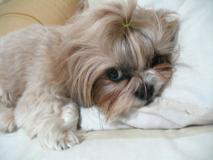

In [ ]:
img = PILImage.create(train_files[4])
img.to_thumb(h=300)

In [ ]:
img.size

(213, 160)

In [ ]:
def get_img_size(file):
  return  PILImage.create(file).size

In [ ]:
from fastcore.parallel import *

In [ ]:
# train_sizes = parallel(get_img_size, train_files)

In [ ]:
# train_sizes

In [ ]:
# df_train_sizes = pd.Series(train_sizes)

In [ ]:
# df_train_sizes.value_counts()

In [ ]:
dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42),
                   item_tfms = Resize(size = (200, 200), method = 'squish'),
                   batch_tfms = aug_transforms(size = (120, 120), min_scale = 1),
)

In [ ]:
dblock.summary(data_folder/'train/train')

Setting-up type transforms pipelines
Found 9025 items
2 datasets of sizes 7220,1805
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/drive/MyDrive/datasets/data/HW8/data_folder/train/train/1/3083.JPEG
    applying PILBase.create gives
      PILImage mode=RGB size=213x160
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/drive/MyDrive/datasets/data/HW8/data_folder/train/train/1/3083.JPEG
    applying parent_label gives
      1
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=213x160, TensorCategory(1))


Found 9025 items
2 datasets of sizes 7220,1805
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': T

In [ ]:
dls = dblock.dataloaders(data_folder/'train/train')

In [ ]:
dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

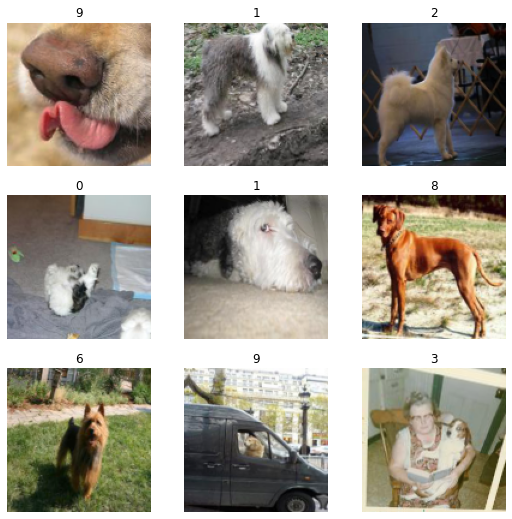

In [ ]:
dls.train.show_batch()

In [ ]:
def get_dataloaders(itfms, btfms):
  dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42),
                   item_tfms = itfms,
                   batch_tfms = btfms, 
                   )
  set_seed(42)
  dls = dblock.dataloaders(train_files[0, 1000, 5000], bs = 3)
  dls.train.show_batch(max_n = 3)

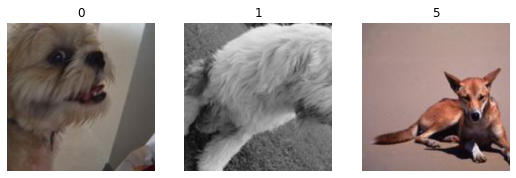

In [ ]:
itfms = Resize((200, 200))
btfms = None
get_dataloaders(itfms, btfms)

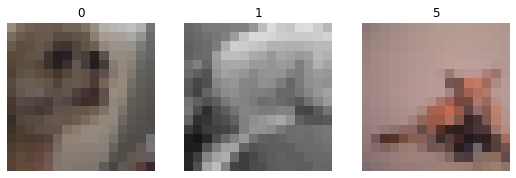

In [ ]:
itfms = Resize((16, 16))
btfms = None
get_dataloaders(itfms, btfms)

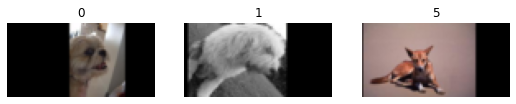

In [ ]:
itfms = Resize((45, 90), method = 'pad', pad_mode = 'zeros')
btfms = None
get_dataloaders(itfms, btfms)

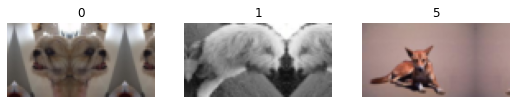

In [ ]:
itfms = Resize((45, 90), method = 'pad', pad_mode = 'reflection')
btfms = None
get_dataloaders(itfms, btfms)

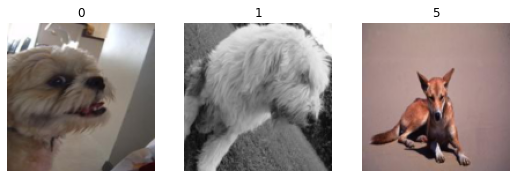

In [ ]:
itfms = Resize((128, 128), method = 'squish')
btfms = None
get_dataloaders(itfms, btfms)

In [ ]:
dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42),
                   item_tfms = Resize(size = (160), method = 'squish'),
                   batch_tfms = aug_transforms(size = (128), min_scale = 1) 
                   )

In [ ]:
dls = dblock.dataloaders(data_folder/'train/train', bs = 64)

In [ ]:
learn = vision_learner(dls, 'resnet26d', metrics = accuracy, path = model_folder).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26d-69e92c46.pth" to /root/.cache/torch/hub/checkpoints/resnet26d-69e92c46.pth


In [ ]:
learn55 = vision_learner(dls, 'convnext_tiny', metrics = accuracy, path = model_folder).to_fp16()

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_1k_224_ema.pth


In [ ]:
# learn55.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
learn55.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.444263,0.330436,0.910803,57:26


epoch,train_loss,valid_loss,accuracy,time
0,0.229129,0.207123,0.938504,00:42
1,0.198784,0.235223,0.936288,00:42
2,0.197783,0.240061,0.935180,00:42
3,0.178211,0.282860,0.924654,00:46
4,0.132827,0.228317,0.940720,00:42
5,0.106491,0.257755,0.938504,00:42
6,0.075848,0.277381,0.931856,00:42
7,0.052705,0.242152,0.937950,00:42
8,0.050731,0.247931,0.941828,00:42
9,0.032580,0.247305,0.941828,00:46


In [ ]:
sample_submission = pd.read_csv(data_folder/'sample_submission.csv')
sample_submission

,file_names,target
0,0.JPEG,7
1,1.JPEG,3
2,2.JPEG,1
3,3.JPEG,0
4,4.JPEG,4
...,...,...
3924,3924.JPEG,1
3925,3925.JPEG,7
3926,3926.JPEG,1
3927,3927.JPEG,3


In [ ]:
sample_submission.sort_values(by = ['file_names'], inplace = True, ignore_index = True)

In [ ]:
sample_submission

,file_names,target
0,0.JPEG,7
1,1.JPEG,3
2,10.JPEG,7
3,100.JPEG,2
4,1000.JPEG,2
...,...,...
3924,995.JPEG,6
3925,996.JPEG,4
3926,997.JPEG,0
3927,998.JPEG,4


In [ ]:
test_files = get_image_files(data_folder/'test/test').sorted()

In [ ]:
test_files

(#3929) [Path('test/test/0.JPEG'),Path('test/test/1.JPEG'),Path('test/test/10.JPEG'),Path('test/test/100.JPEG'),Path('test/test/1000.JPEG'),Path('test/test/1001.JPEG'),Path('test/test/1002.JPEG'),Path('test/test/1003.JPEG'),Path('test/test/1004.JPEG'),Path('test/test/1005.JPEG')...]

In [ ]:
test_dl = dls.test_dl(test_files)

In [ ]:
# test_dl.show_batch(max_n = 3)

In [ ]:
preds, _ = learn55.tta(dl = test_dl)

In [ ]:
idxs = preds.argmax(dim = 1)

In [ ]:
idxs

TensorBase([7, 2, 0,  ..., 8, 3, 6])

In [ ]:
vocab = np.array(learn55.dls.vocab)

In [ ]:
vocab

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [ ]:
sample_submission['target'] = 0

In [ ]:
sample_submission

,file_names,target
0,0.JPEG,0
1,1.JPEG,0
2,10.JPEG,0
3,100.JPEG,0
4,1000.JPEG,0
...,...,...
3924,995.JPEG,0
3925,996.JPEG,0
3926,997.JPEG,0
3927,998.JPEG,0


In [ ]:
results = pd.Series(vocab[idxs], name = 'idxs')

In [ ]:
results

0       7
1       2
2       0
3       5
4       3
       ..
3924    7
3925    7
3926    8
3927    3
3928    6
Name: idxs, Length: 3929, dtype: object

In [ ]:
sample_submission['target'] = results

In [ ]:
sample_submission

,file_names,target
0,0.JPEG,7
1,1.JPEG,2
2,10.JPEG,0
3,100.JPEG,5
4,1000.JPEG,3
...,...,...
3924,995.JPEG,7
3925,996.JPEG,7
3926,997.JPEG,8
3927,998.JPEG,3


In [ ]:
sample_submission.to_csv(model_folder/'inclass_12_02.csv', index = False)

In [ ]:
!head {model_folder/'inclass_12_02.csv'}

file_names,target
0.JPEG,7
1.JPEG,2
10.JPEG,0
100.JPEG,5
1000.JPEG,3
1001.JPEG,5
1002.JPEG,3
1003.JPEG,3
1004.JPEG,8


In [ ]:
comp = 'inclassdlfall22'

In [ ]:
from kaggle import api

In [ ]:
api.competition_submit(model_folder/'inclass_12_02.csv', 'inclass', comp)

100%|██████████| 45.0k/45.0k [00:03<00:00, 12.6kB/s]


Successfully submitted to Inclass_DL_Fall_22

## Next Model

In [ ]:
learn.fine_tune(10, 0.03)

epoch,train_loss,valid_loss,accuracy,time
0,0.133130,1.199865,0.861496,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.139879,0.778117,0.882548,00:43
1,0.228969,0.840940,0.856510,00:42
2,0.284272,0.695846,0.845429,00:42
3,0.221203,0.584037,0.857064,00:44
4,0.203547,0.667549,0.854294,00:42
5,0.147299,0.594563,0.864820,00:42
6,0.104926,0.527908,0.876454,00:42
7,0.070281,0.503623,0.880886,00:44
8,0.040662,0.478583,0.883657,00:42
9,0.039856,0.474344,0.886427,00:41


In [ ]:
learn2 = vision_learner(dls, 'convnext_small_in22k', metrics = accuracy, path = model_folder, n_out=10).to_fp16()

SuggestedLRs(valley=0.0014454397605732083)

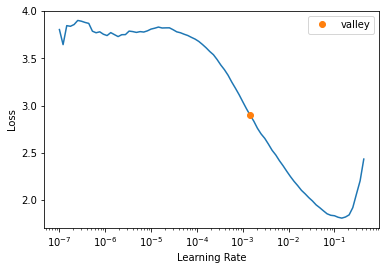

In [ ]:
learn2.lr_find()

In [ ]:
learn2.fine_tune(10, 0.03)

epoch,train_loss,valid_loss,accuracy,time
0,0.735123,0.741503,0.872576,15:07


epoch,train_loss,valid_loss,accuracy,time
0,0.394042,0.326174,0.909141,00:49
1,0.340325,0.465747,0.890305,00:49
2,0.335833,0.511893,0.877008,00:49
3,0.258640,0.378206,0.899169,00:50
4,0.196297,0.400062,0.906371,00:48
5,0.112585,0.299879,0.926316,00:49
6,0.063996,0.361433,0.924654,00:49
7,0.043178,0.313786,0.936288,00:49
8,0.017456,0.325197,0.928532,00:51
9,0.014997,0.316256,0.936288,00:49


In [ ]:
learn2.fine_tune(10, 0.0014)

epoch,train_loss,valid_loss,accuracy,time
0,0.675041,0.312292,0.910249,00:45


epoch,train_loss,valid_loss,accuracy,time
0,0.337611,0.269010,0.915789,00:48
1,0.302275,0.264971,0.918560,00:48
2,0.250546,0.235170,0.924100,00:50
3,0.214866,0.226828,0.926870,00:52
4,0.176384,0.235698,0.932410,00:50
5,0.144103,0.225793,0.931856,00:50
6,0.115540,0.231212,0.932410,00:50
7,0.106778,0.228722,0.931856,00:50
8,0.094679,0.226422,0.932964,00:51
9,0.087717,0.226672,0.933518,00:49


In [ ]:
learn2.fine_tune(10, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.351007,0.433073,0.903047,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.237353,0.283082,0.920776,00:50
1,0.199934,0.318341,0.920776,00:49
2,0.200125,0.287152,0.935180,00:51
3,0.188968,0.372514,0.919114,00:48
4,0.136915,0.314323,0.931856,00:50
5,0.076675,0.258041,0.936842,00:50
6,0.052338,0.276997,0.934072,00:52
7,0.031876,0.308015,0.937396,00:50
8,0.028659,0.299562,0.938504,00:50
9,0.023552,0.299376,0.938504,00:51


In [ ]:
learn2.fine_tune(10, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.629702,2.227448,0.878116,00:50


epoch,train_loss,valid_loss,accuracy,time
0,1.040421,1.183282,0.883102,00:50
1,0.799074,1.399955,0.815512,00:49
2,0.653201,0.898152,0.831025,00:49
3,0.649863,1.511495,0.725762,00:51
4,0.373537,1.488173,0.862604,00:49
5,0.284725,1.088345,0.857064,00:48
6,0.224507,0.443494,0.895291,00:50
7,0.076776,0.398407,0.910249,00:52
8,0.029898,0.411376,0.913573,00:50
9,0.020886,0.398104,0.916344,00:49


# Next Model

In [ ]:
learn3 = vision_learner(dls, 'convnext_large_in22k', metrics = accuracy, path = model_folder, n_out=10).to_fp16()

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_large_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_large_22k_224.pth


SuggestedLRs(valley=0.0006918309954926372)

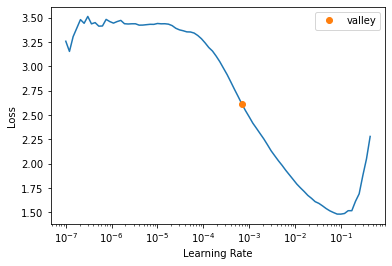

In [ ]:
learn3.lr_find()

In [ ]:
learn3.fine_tune(10, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.372036,0.303875,0.925762,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.223100,0.195142,0.947368,01:08
1,0.177801,0.245014,0.938504,01:08
2,0.181318,0.286472,0.935180,01:11
3,0.136836,0.240413,0.946814,01:08
4,0.081630,0.312425,0.934072,01:08
5,0.043457,0.276640,0.942382,01:11
6,0.026886,0.282520,0.944598,01:08
7,0.019270,0.262618,0.949584,01:08
8,0.011525,0.249426,0.957895,01:09
9,0.005662,0.247394,0.955125,01:09


In [ ]:
learn3.fine_tune(10, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.004311,0.259636,0.952909,00:59


epoch,train_loss,valid_loss,accuracy,time
0,0.006898,0.261455,0.952909,01:07
1,0.005173,0.266678,0.955125,01:08
2,0.004625,0.272931,0.956787,01:10
3,0.005071,0.271330,0.956233,01:08
4,0.006725,0.274139,0.957895,01:07
5,0.004785,0.273378,0.953463,01:08
6,0.005066,0.273753,0.956787,01:10
7,0.004735,0.277952,0.955125,01:08
8,0.003232,0.273821,0.954571,01:09
9,0.003256,0.270908,0.956233,01:07


In [ ]:
learn3.fine_tune(10, 0.0008)

epoch,train_loss,valid_loss,accuracy,time
0,0.549920,0.237455,0.923546,20:32


epoch,train_loss,valid_loss,accuracy,time
0,0.236896,0.203915,0.933518,01:07
1,0.202733,0.209441,0.934626,01:08
2,0.174817,0.201275,0.941274,01:10
3,0.133992,0.206877,0.943490,01:12
4,0.112111,0.187394,0.949030,01:13
5,0.088895,0.186287,0.947368,01:13
6,0.067518,0.182275,0.950693,01:11
7,0.049013,0.190119,0.947368,01:14
8,0.044018,0.194389,0.949030,01:12
9,0.046630,0.195301,0.949584,01:12


In [ ]:
learn3.fine_tune(20, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.067686,0.277751,0.939058,01:01


epoch,train_loss,valid_loss,accuracy,time
0,0.063997,0.220842,0.949584,01:11
1,0.051985,0.218852,0.946814,01:12
2,0.048676,0.216474,0.948476,01:14
3,0.040934,0.211881,0.949030,01:12
4,0.039344,0.237626,0.940720,01:12
5,0.046141,0.240989,0.949030,01:14
6,0.039928,0.222034,0.947922,01:12
7,0.039909,0.237704,0.950693,01:13
8,0.036577,0.239201,0.952909,01:12
9,0.033027,0.234339,0.951247,01:13
